In [2]:
# neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.optimize import minimize

# The Product-Mix programming

min
x
1
x
4
(
x
1
+
x
2
+
x
3
)
+
x
3
 
s
.
t
.

x
1
x
2
x
3
x
4
≥
25

x1^2 + x2^2 + x3^2 + x4^2
=
40

1
≤
x
1
,
x
2
,
x
3
,
x
4
≤
5

In [4]:
# define variables and objective functions
def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    return x1*x4*(x1+x2+x3)+x3

# define constraints
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_sq=40.0
    for i in range(4):
        sum_sq=sum_sq-x[i]**2
    return sum_sq



In [5]:
# define variables bounds and limitations and put them in a tuple
b=(1.0,5.0)
bnds=(b,b,b,b)
# determine the type of constraints and put them in a list
con1={'type':'ineq','fun':constraint1}
con2={'type':'eq','fun':constraint2}
cons=[con1,con2]

In [8]:
x0=[1,5,5,1] #initial guess
sol=minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons) #SLSQP is an optimization method
print(sol)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 17.01401724563517
       x: [ 1.000e+00  4.743e+00  3.821e+00  1.379e+00]
     nit: 5
     jac: [ 1.457e+01  1.379e+00  2.379e+00  9.564e+00]
    nfev: 25
    njev: 5


# Unconstrained NLP

minimize Z = 100 * ( x1 - x2^2 )^2 + ( x - x2 )^2

No constraint


In [22]:
from scipy.optimize import rosen #rosen function is the name of the general form of our objective function --> rosen=sigma[100*[x(i)-x(i+1)^2]] ; i=N

x0=np.array([1.3,0.7,0.8,1.9,1.2]) # for N=5
sol=minimize(rosen,x0,method='nelder-mead') #another optimization method for unconstrained NLP / many options can be added 
print(sol)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 6.617481708884532e-05
             x: [ 9.991e-01  9.982e-01  9.965e-01  9.930e-01  9.860e-01]
           nit: 141
          nfev: 243
 final_simplex: (array([[ 9.991e-01,  9.982e-01, ...,  9.930e-01,
                         9.860e-01],
                       [ 9.991e-01,  9.982e-01, ...,  9.930e-01,
                         9.861e-01],
                       ...,
                       [ 9.991e-01,  9.982e-01, ...,  9.929e-01,
                         9.860e-01],
                       [ 9.991e-01,  9.982e-01, ...,  9.930e-01,
                         9.860e-01]]), array([ 6.617e-05,  6.643e-05,  6.666e-05,  6.694e-05,
                        6.707e-05,  6.709e-05]))


# least-squares method

answer the rosen optimization using least-squares method

In [25]:
from scipy.optimize import least_squares # using to find local optimum not exact optimum point

input=np.array([2,2]) #initial guess
sol=least_squares(rosen , input)
print (sol)

     message: The maximum number of function evaluations is exceeded.
     success: False
      status: 0
         fun: [ 1.888e-01]
           x: [ 1.434e+00  2.058e+00]
        cost: 0.017831210766105204
         jac: [[-5.023e-01  4.778e-01]]
        grad: [-9.486e-02  9.022e-02]
  optimality: 0.0948601958652652
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 200
        njev: 196


# one-dimentional search (Root Finding)

f(x) = 12x - 3x^4 - 2x^6

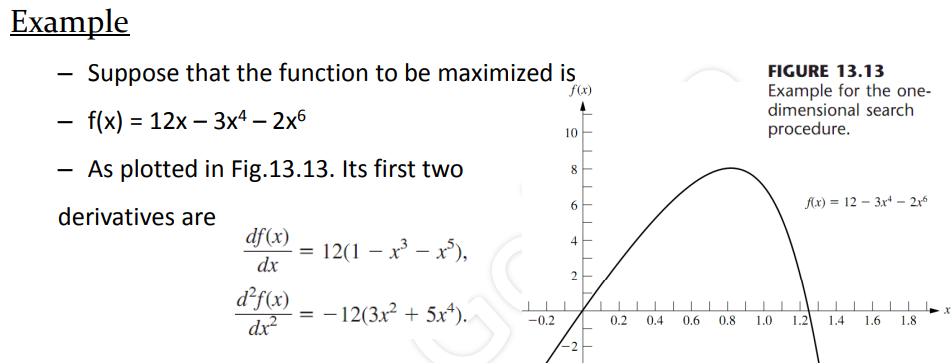

In [14]:
from scipy.optimize import root_scalar
# first derivative 
def g(x):
    return 12-12*x**3-12*x**5


#second derivative
def g_prime(x):
    return -12*(3*x**2-5*x**4)


In [16]:
sol=root_scalar(g , bracket=[0,2], method='brentq') # determine the g(x), the range of optimum point and the method
print(sol)

      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.8376197748269621
